In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import seaborn as sb
import missingno as msn
sb.set()

train = pd.read_csv('C:/Users/Jitender kumar/Desktop/Data/train.csv')

train.head()

,WD_WS,VISIBILITY,WEATHER,LOWEST_CLOUD,LOW_CLOUD,MID_CLOUD,CURRENT_TEMP,DEW_POINT,RH,WS
0,4,1000,2,0,0,0,16,13,82.385952,2.056
1,5,1000,0,0,0,0,18,13,72.582142,2.570
2,4,1100,0,0,0,0,20,13,64.068289,2.056
3,4,1100,0,0,0,0,20,13,64.068289,2.056
4,4,1200,0,0,0,0,21,13,60.236209,2.056


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13511 entries, 0 to 13510
Data columns (total 10 columns):
WD_WS           13511 non-null int64
VISIBILITY      13511 non-null int64
WEATHER         13511 non-null int64
LOWEST_CLOUD    13511 non-null int64
LOW_CLOUD       13511 non-null int64
MID_CLOUD       13511 non-null int64
CURRENT_TEMP    13511 non-null int64
DEW_POINT       13511 non-null int64
RH              13511 non-null float64
WS              13511 non-null float64
dtypes: float64(2), int64(8)
memory usage: 1.0 MB


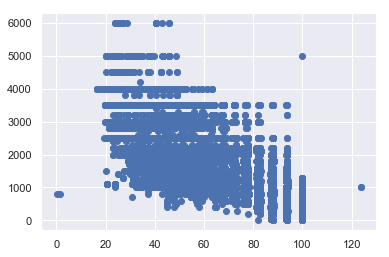

In [3]:
plt.scatter(train['RH'], train['VISIBILITY'])
plt.show()

In [4]:
train.describe()

,WD_WS,VISIBILITY,WEATHER,LOWEST_CLOUD,LOW_CLOUD,MID_CLOUD,CURRENT_TEMP,DEW_POINT,RH,WS
count,13511.000000,13511.000000,13511.000000,13511.000000,13511.000000,13511.000000,13511.000000,13511.000000,13511.000000,13511.000000
mean,4.322034,1748.564355,1.422101,0.425431,0.762268,0.549034,17.199689,9.408186,64.625404,2.221525
std,3.323334,1057.711053,1.425416,1.232505,1.751818,1.590992,5.946811,3.625858,21.779544,1.708194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,0.055055,0.000000
25%,3.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,13.000000,7.000000,46.189769,1.542000
50%,4.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,17.000000,9.000000,64.287246,2.056000
75%,6.000000,2500.000000,2.000000,0.000000,0.000000,0.000000,21.000000,12.000000,82.509293,3.084000
max,24.000000,6000.000000,16.000000,9.000000,9.000000,9.000000,218.000000,21.000000,123.757908,12.336000


In [5]:
fog = []
for i in range(len(train['VISIBILITY'])):
    if train['VISIBILITY'][i]<999 and train['VISIBILITY'][i]>=500:
        fog.append('Shallow Fog')
    elif train['VISIBILITY'][i]<500 and train['VISIBILITY'][i]>=200:
        fog.append('Moderate Fog')
    elif train['VISIBILITY'][i]<200 and train['VISIBILITY'][i]>=50:
        fog.append('Dense Fog')
    elif train['VISIBILITY'][i]<50:
        fog.append('Very Dense Fog')
    else:
        fog.append('Negligible Fog')

In [6]:
len(fog)

13511

In [7]:
fog = pd.DataFrame(fog)

In [8]:
fog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13511 entries, 0 to 13510
Data columns (total 1 columns):
0    13511 non-null object
dtypes: object(1)
memory usage: 105.6+ KB


In [9]:
train['FOG'] = fog

In [10]:
train.head(10)

,WD_WS,VISIBILITY,WEATHER,LOWEST_CLOUD,LOW_CLOUD,MID_CLOUD,CURRENT_TEMP,DEW_POINT,RH,WS,FOG
0,4,1000,2,0,0,0,16,13,82.385952,2.056,Negligible Fog
1,5,1000,0,0,0,0,18,13,72.582142,2.570,Negligible Fog
2,4,1100,0,0,0,0,20,13,64.068289,2.056,Negligible Fog
3,4,1100,0,0,0,0,20,13,64.068289,2.056,Negligible Fog
4,4,1200,0,0,0,0,21,13,60.236209,2.056,Negligible Fog
5,4,1200,0,0,0,0,21,13,60.236209,2.056,Negligible Fog
6,4,1200,0,0,0,0,21,13,60.236209,2.056,Negligible Fog
7,6,1300,0,0,0,0,21,13,60.236209,3.084,Negligible Fog
8,6,1300,0,0,0,0,21,13,60.236209,3.084,Negligible Fog
9,5,1500,0,0,0,0,22,13,56.659699,2.570,Negligible Fog


In [12]:
fog_mapping = { "Shallow Fog" : 0, "Moderate Fog" : 1, "Dense Fog" : 2, "Very Dense Fog" : 3, "Negligible Fog" : 4}

train['FOG'] = train['FOG'].map(fog_mapping)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13511 entries, 0 to 13510
Data columns (total 11 columns):
WD_WS           13511 non-null int64
VISIBILITY      13511 non-null int64
WEATHER         13511 non-null int64
LOWEST_CLOUD    13511 non-null int64
LOW_CLOUD       13511 non-null int64
MID_CLOUD       13511 non-null int64
CURRENT_TEMP    13511 non-null int64
DEW_POINT       13511 non-null int64
RH              13511 non-null float64
WS              13511 non-null float64
FOG             13511 non-null int64
dtypes: float64(2), int64(9)
memory usage: 1.1 MB


In [15]:
train.to_csv("C:\\Users\\Jitender kumar\\Desktop\\train.csv", index=None)